## Churn Prediction

__What is Customer Churn?__

Customer churn is defined as when customers or subscribers discontinue doing business with a company providing a service service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


__Objectives__
- I will explore the data and try to answer some questions like:
- Organize dataset features
- Preprocess the dataset for churn prediction
- build models than can predict if a customer will churn or not based on selected features.
- Develop metrics to measure model performance

__Dataset Features__

- customerID: Unique identifier for each customer.
- gender: Gender of the customer (Male, Female).
- SeniorCitizen: Whether the customer is a senior citizen or not (1: Yes, 0: No).
- Partner: Whether the customer has a partner or not (Yes, No).
- Dependents: Whether the customer has dependents or not (Yes, No).
- tenure: Number of months the customer has stayed with the company.
- PhoneService: Whether the customer has a phone service or not (Yes, No).
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service).
- InternetService: Type of internet service the customer has (DSL, Fiber optic, No).
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service).
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service).
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service).
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service).
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service).
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service).
- Contract: The contract term of the customer (Month-to-month, One year, Two year).
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No).
- PaymentMethod: The payment method of the customer (Electronic check, Mailed check, Bank transfer, Credit card).
- MonthlyCharges: The amount charged to the customer monthly.
- TotalCharges: The total amount charged to the customer.
- Churn: Whether the customer churned or not (Yes, No).

In [80]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint

In [4]:
df= pd.read_csv('CustomerChurn.csv')

In [5]:
#import the dataset
df.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data preprocessing

In [6]:
#remove spaces in column name
df.columns= [x.replace(' ', '_') for x in df.columns]

In [7]:
# verify
df.head()

,LoyaltyID,Customer_ID,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Customer_ID        7043 non-null   object 
 2   Senior_Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone_Service      7043 non-null   object 
 7   Multiple_Lines     7043 non-null   object 
 8   Internet_Service   7043 non-null   object 
 9   Online_Security    7043 non-null   object 
 10  Online_Backup      7043 non-null   object 
 11  Device_Protection  7043 non-null   object 
 12  Tech_Support       7043 non-null   object 
 13  Streaming_TV       7043 non-null   object 
 14  Streaming_Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless_Billing  7043 

- There is a total of 7043 observations.
- As seen, their are 21 columns with 18 of the columns being of the object type.
- There are no null values and so we can go ahead withouth needing to drop null.

Now lets run a df.describe to reveal some descriptive statistics. This could be useful om knowing if we have outliers in the values and to also understand the spread of values.

In [9]:
df.describe()

,LoyaltyID,Tenure,Monthly_Charges
count,7043.000000,7043.000000,7043.000000
mean,550382.651001,32.371149,64.761692
std,260776.118690,24.559481,30.090047
min,100346.000000,0.000000,18.250000
25%,323604.500000,9.000000,35.500000
50%,548704.000000,29.000000,70.350000
75%,776869.000000,55.000000,89.850000
max,999912.000000,72.000000,118.750000


As seen, the describe method only workd with the numerical column. This is also true for correlation and other most inferential statistics.

__Get dummies__

In other to work with the values in our churn prediction models, we need to convert the categorical values into integers of dummies. This can be done using the get_dummies method. Dummies work by converting each category in a categorical column to numbers. This way our machine learning model will be able to work with the values.

In [10]:
list(df.Partner.value_counts().index)

['No', 'Yes']

In [11]:
df.Partner.unique()[0]

'Yes'

In [12]:
#first we check for the unique entries to be replaced with dummies 
non_cat_columns= ['LoyaltyID', 'Customer_ID', 'Tenure', 'Monthly_Charges', 'Total_Charges']
dict1= {}
for items in df.columns:
    if items not in non_cat_columns:
        dict1[items]= list(df[items].value_counts().index) 
dict1

{'Senior_Citizen': ['No', 'Yes'],
 'Partner': ['No', 'Yes'],
 'Dependents': ['No', 'Yes'],
 'Phone_Service': ['Yes', 'No'],
 'Multiple_Lines': ['No', 'Yes', 'No phone service'],
 'Internet_Service': ['Fiber optic', 'DSL', 'No'],
 'Online_Security': ['No', 'Yes', 'No internet service'],
 'Online_Backup': ['No', 'Yes', 'No internet service'],
 'Device_Protection': ['No', 'Yes', 'No internet service'],
 'Tech_Support': ['No', 'Yes', 'No internet service'],
 'Streaming_TV': ['No', 'Yes', 'No internet service'],
 'Streaming_Movies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'Two year', 'One year'],
 'Paperless_Billing': ['Yes', 'No'],
 'Payment_Method': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

As seen, the column with the highest cumber of unique values is the payment method column with 4 categories while the other ones are only 2 or 3. 

In [13]:
data_cat= df.drop(non_cat_columns, axis=1)
data_cat.head(2)

,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Churn
0,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


In [14]:
data= pd.get_dummies(data= data_cat, drop_first= True, dtype= int)
data.head(2)

,Senior_Citizen_Yes,Partner_Yes,Dependents_Yes,Phone_Service_Yes,Multiple_Lines_No phone service,Multiple_Lines_Yes,Internet_Service_Fiber optic,Internet_Service_No,Online_Security_No internet service,Online_Security_Yes,...,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Paperless_Billing_Yes,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


Now let's combine the other columns that were excluded, but first we need to make sure they are in float or integer dtype.

In [15]:
df[non_cat_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LoyaltyID        7043 non-null   int64  
 1   Customer_ID      7043 non-null   object 
 2   Tenure           7043 non-null   int64  
 3   Monthly_Charges  7043 non-null   float64
 4   Total_Charges    7043 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 275.2+ KB


Only Tenure, Monthly_chargees and Loyalty_id are in int or float format. but we only need Tenure, Monthly charges and total charges for our modelling. We therefore only need to convert the Total_charges to float.

In [16]:
df['Total_Charges'].astype('float64', errors= 'ignore')

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: Total_Charges, Length: 7043, dtype: object

The casting to type is not working so, we need to visually inspect the column for non-numeric values

In [17]:
list(df['Total_Charges'])

['29.85',
 '1889.5',
 '108.15',
 '1840.75',
 '151.65',
 '820.5',
 '1949.4',
 '301.9',
 '3046.05',
 '3487.95',
 '587.45',
 '326.8',
 '5681.1',
 '5036.3',
 '2686.05',
 '7895.15',
 '1022.95',
 '7382.25',
 '528.35',
 '1862.9',
 '39.65',
 '202.25',
 '20.15',
 '3505.1',
 '2970.3',
 '1530.6',
 '4749.15',
 '30.2',
 '6369.45',
 '1093.1',
 '6766.95',
 '181.65',
 '1874.45',
 '20.2',
 '45.25',
 '7251.7',
 '316.9',
 '3548.3',
 '3549.25',
 '1105.4',
 '475.7',
 '4872.35',
 '418.25',
 '4861.45',
 '981.45',
 '3906.7',
 '97',
 '144.15',
 '4217.8',
 '4254.1',
 '3838.75',
 '1426.4',
 '1752.65',
 '633.3',
 '4456.35',
 '1752.55',
 '6311.2',
 '7076.35',
 '894.3',
 '7853.7',
 '4707.1',
 '5450.7',
 '2962',
 '957.1',
 '857.25',
 '244.1',
 '3650.35',
 '2497.2',
 '930.9',
 '887.35',
 '49.05',
 '1090.65',
 '7099',
 '1424.6',
 '177.4',
 '6139.5',
 '2688.85',
 '482.25',
 '2111.3',
 '1216.6',
 '79.35',
 '565.35',
 '496.9',
 '4327.5',
 '973.35',
 '918.75',
 '2215.45',
 '1057',
 '927.1',
 '1009.25',
 '2570.2',
 '74.7',

As seen, there are some non-numeric values (empty string) in the column which must have been preventing the method from casting it to type float. Lets find the values out.

In [18]:
df[df['Total_Charges']== ' ']

,LoyaltyID,Customer_ID,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
488,344543,4472-LVYGI,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,150036,3115-CZMZD,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,497688,5709-LVOEQ,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,158969,4367-NUYAO,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,470044,1371-DWPAZ,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,937662,7644-OMVMY,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,821083,3213-VVOLG,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,947028,2520-SGTTA,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,135257,2923-ARZLG,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,317862,4075-WKNIU,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


lets replace the empty values

In [19]:
df['Total_Charges']= df['Total_Charges'].replace(' ', np.NaN).astype('float64')

In [20]:
dataset= pd.concat([df[['Tenure','Monthly_Charges', 'Total_Charges']], data], axis= 1)

In [21]:
dataset.fillna(dataset['Total_Charges'].mean(), inplace= True)

In [22]:
dataset.head(3)

,Tenure,Monthly_Charges,Total_Charges,Senior_Citizen_Yes,Partner_Yes,Dependents_Yes,Phone_Service_Yes,Multiple_Lines_No phone service,Multiple_Lines_Yes,Internet_Service_Fiber optic,...,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Paperless_Billing_Yes,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Churn_Yes
0,1,29.85,29.85,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Tenure                                  7043 non-null   int64  
 1   Monthly_Charges                         7043 non-null   float64
 2   Total_Charges                           7043 non-null   float64
 3   Senior_Citizen_Yes                      7043 non-null   int32  
 4   Partner_Yes                             7043 non-null   int32  
 5   Dependents_Yes                          7043 non-null   int32  
 6   Phone_Service_Yes                       7043 non-null   int32  
 7   Multiple_Lines_No phone service         7043 non-null   int32  
 8   Multiple_Lines_Yes                      7043 non-null   int32  
 9   Internet_Service_Fiber optic            7043 non-null   int32  
 10  Internet_Service_No                     7043 non-null   int3

Now we have everything in numerical datatypes. We can go ahead with modelling. But we need to first understand the correlation between the values so we can carry out feature selection if need be.

<Axes: ylabel='Frequency'>

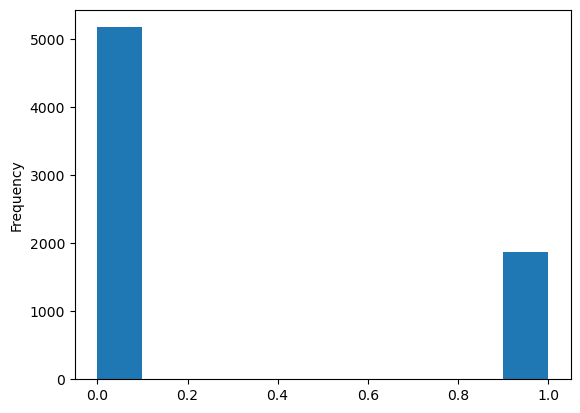

In [24]:
dataset['Churn_Yes'].plot.hist()

<Axes: >

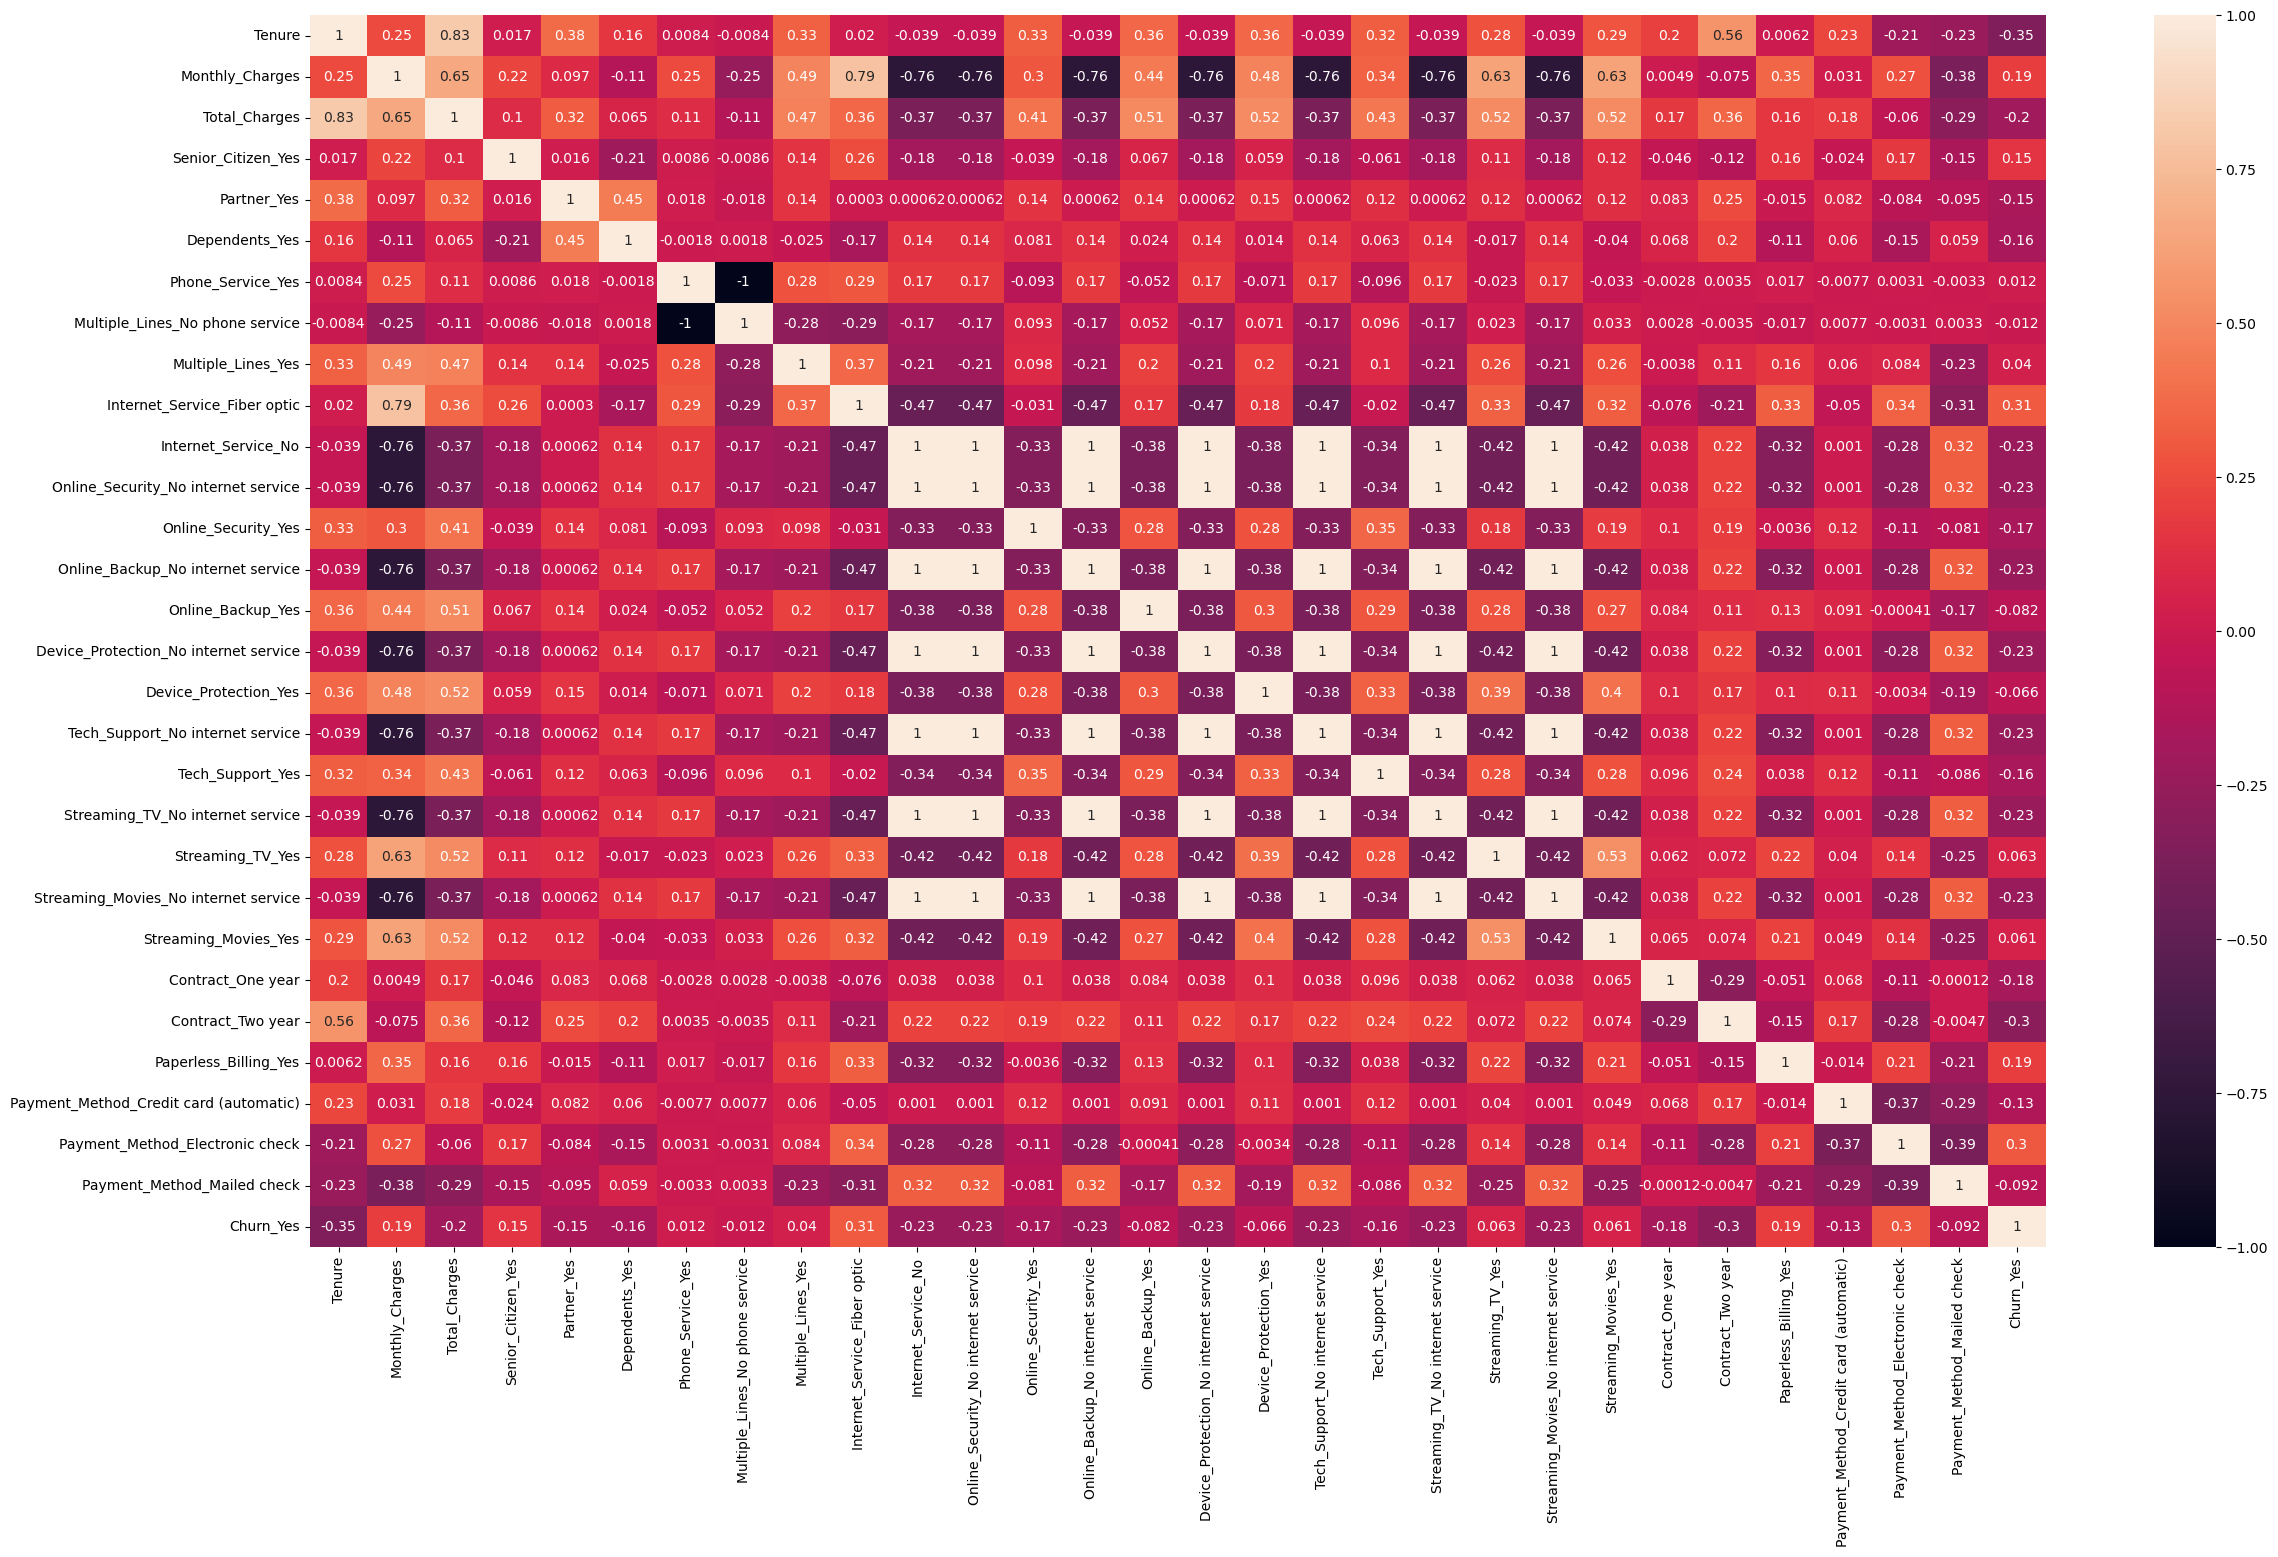

In [91]:
plt.figure(figsize=(28,16))
sns.heatmap(dataset.corr(), annot= True)

As seen in the correlation map, some features are highly correlated with each other, including them in the model will lead to high multicolinearity. We can therefore manually remove them, or use dimensionality reduction models like PCA. I will go ahead and remove them.

__COLUMNS TO DROP__

<li> Multiple_Lines_No phone service
<li> Online_Security_No internet service 
<li> Online_Backup_No internet service 
<li> Device_Protection_No internet service 
<li> Tech_Support_No internet service 
<li> Streaming_Movies_No internet service 
<li> Streaming_TV_No internet service
    
__KEEPING__
<li> Phone_service_Yes

In [25]:
no_services= ['Multiple_Lines_No phone service', 'Online_Security_No internet service','Online_Backup_No internet service','Device_Protection_No internet service','Tech_Support_No internet service','Streaming_Movies_No internet service', 'Streaming_TV_No internet service']
dataset1= dataset.drop(no_services, axis=1)

<Axes: >

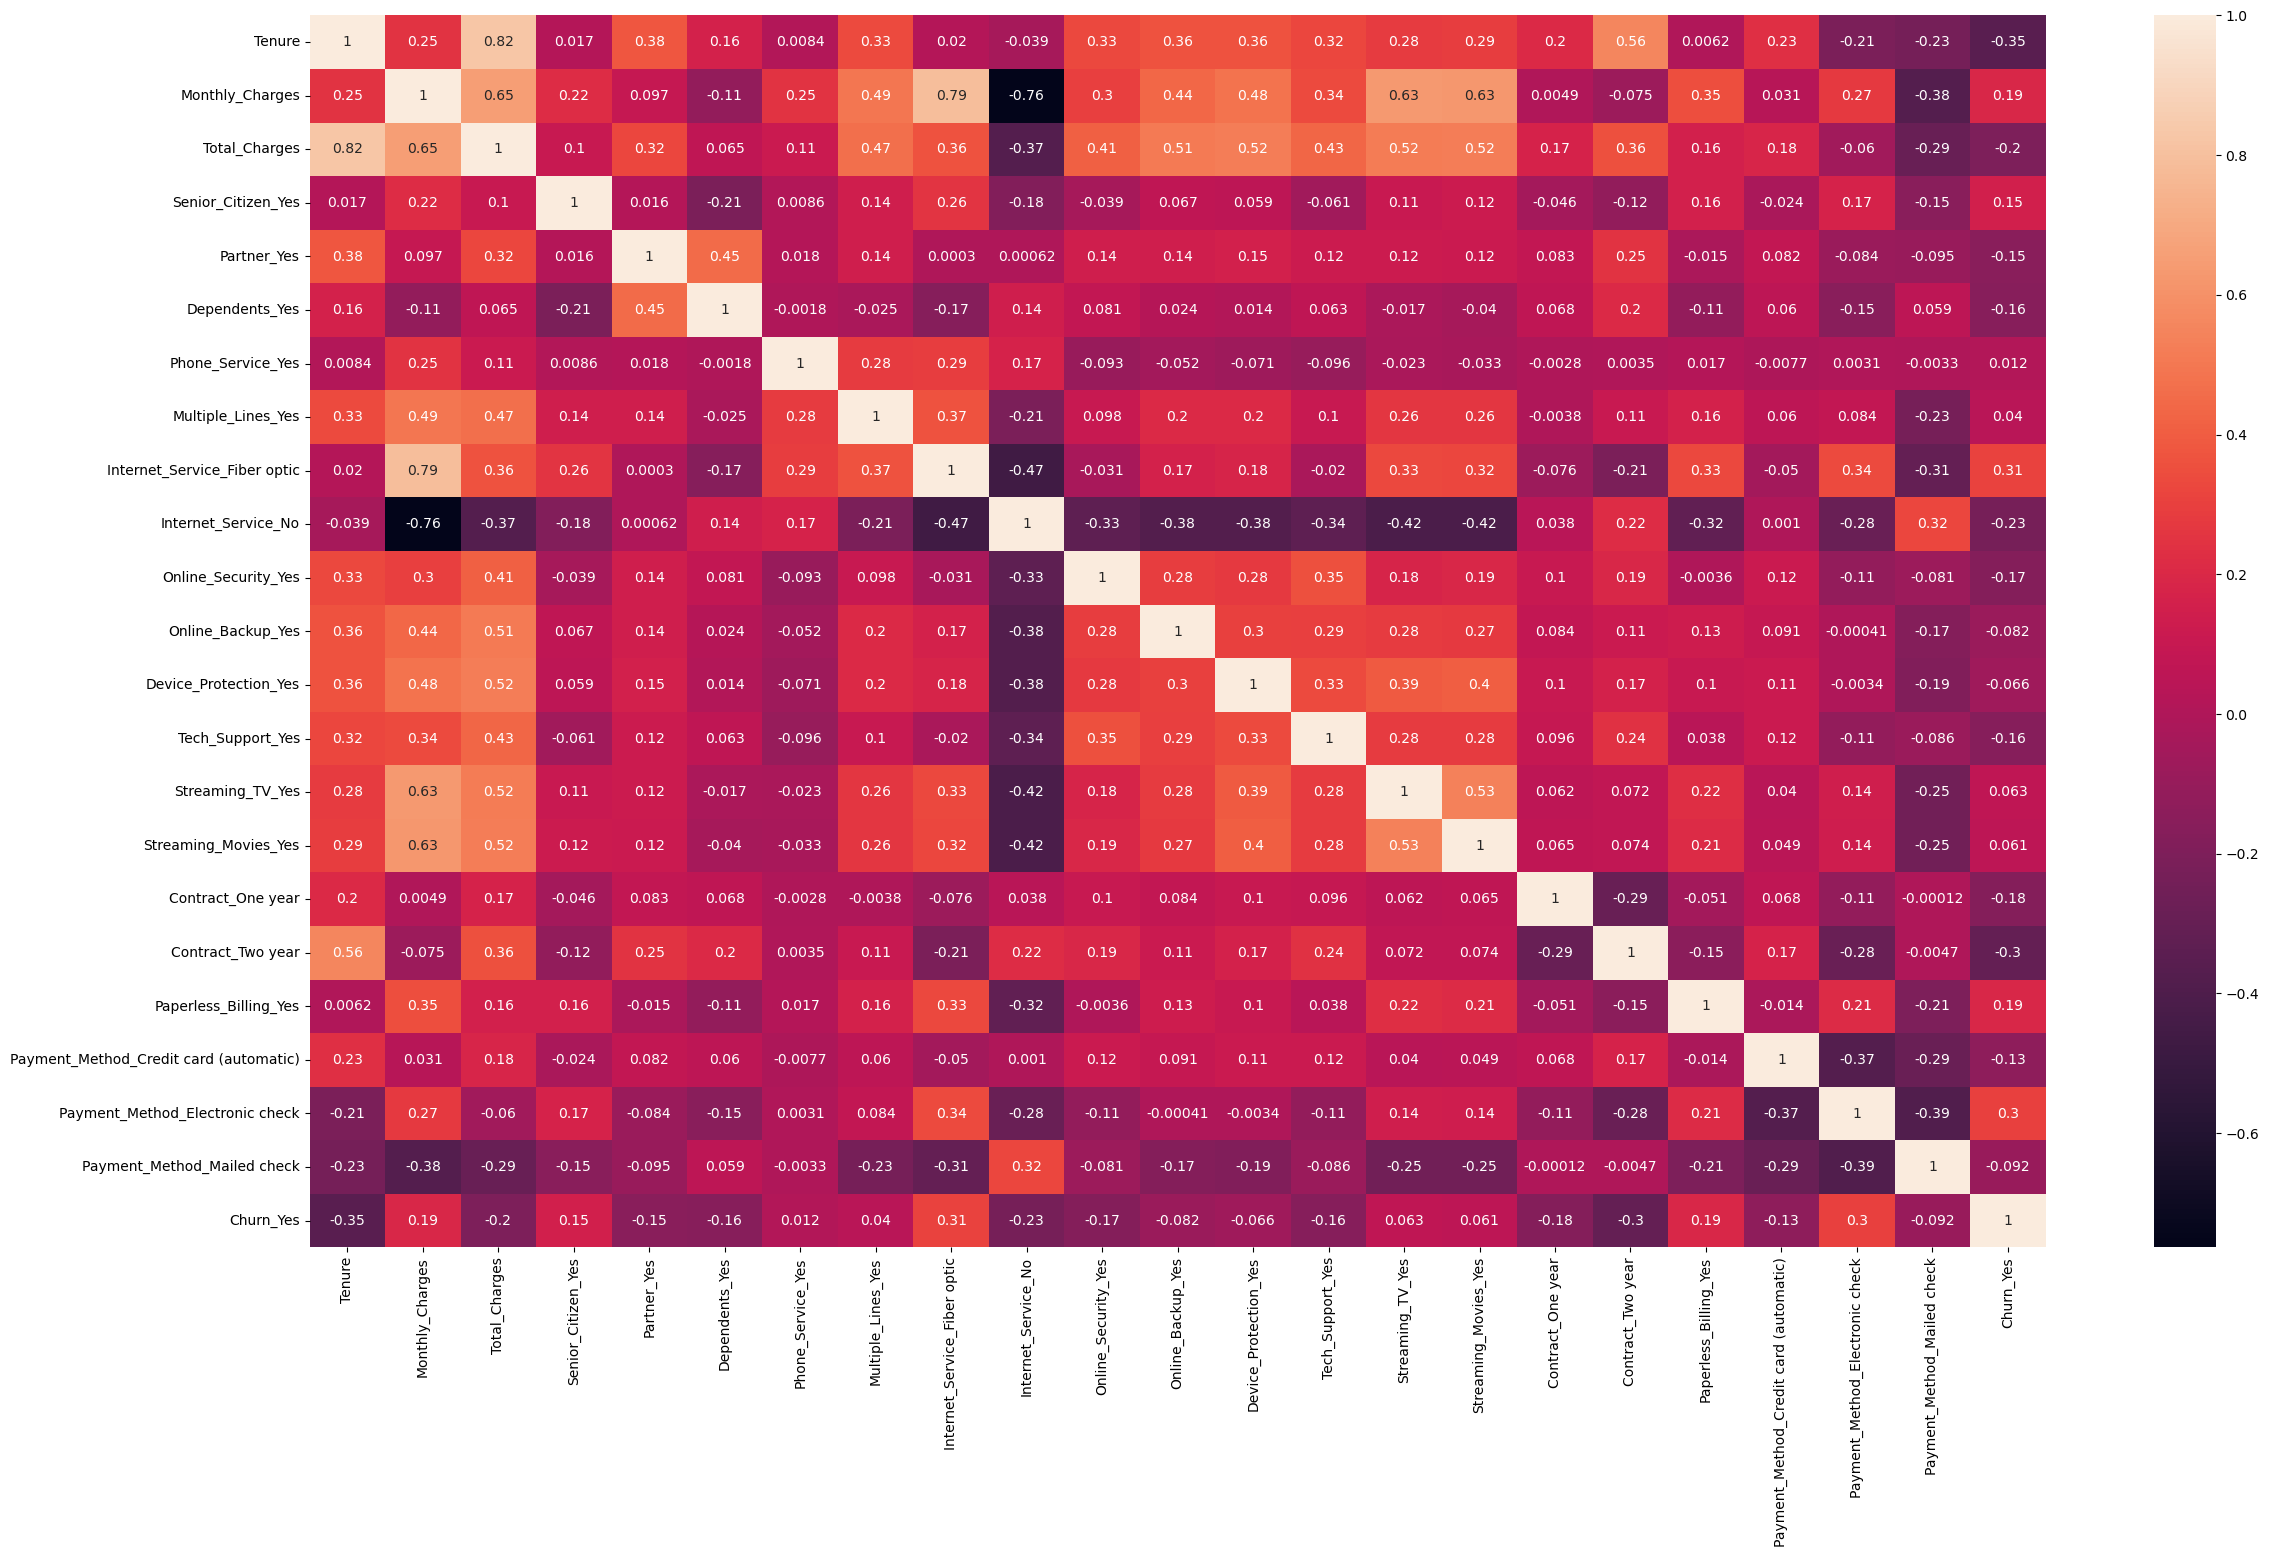

In [23]:
plt.figure(figsize=(28,16))
sns.heatmap(dataset1.corr(), annot= True)

### Modeling

In [26]:
#get x and y
X= dataset1.drop('Churn_Yes', axis= 1)
y= dataset1['Churn_Yes']

In [27]:
#split into train and test
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=1, test_size= 0.3) 

Due to the inbalance of the measuring scale of the X features, there is a need to scale them down to the same scale. for this project, I will use the sklearn standard scaler, to scale tthe features to 0 mean and 1 standard deviation.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
Xtrain_scaled= scaler.fit_transform(X_train)
Xtest_scaled= scaler.fit_transform(X_test)

__Lets try the logistic regression model on the features__

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model_lr= LogisticRegression()
model_lr.fit(Xtrain_scaled, y_train)

LogisticRegression()

In [33]:
#get predictions
pred= model_lr.predict(Xtest_scaled)

In [84]:
#Metrics
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

In [35]:
accuracy= accuracy_score(y_test, pred)
f1_score_lr= f1_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print('Metrics')
print('..........................................')
print('Accuracy score: ------------ ', accuracy)
print('F1 score: ------------------ ', f1_score_lr)
print('Precision score ------------ ', precision)
print('Recall score --------------- ', recall)

Metrics
..........................................
Accuracy score: ------------  0.807382867960246
F1 score: ------------------  0.6075216972034716
Precision score ------------  0.618860510805501
Recall score ---------------  0.5965909090909091


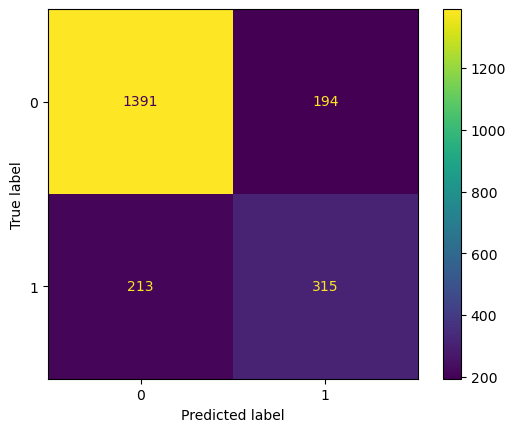

In [86]:
cm = confusion_matrix(y_test, pred, labels=model_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_lr.classes_)
disp.plot()

As seen earlier, the categories observations in the target class is not equal. The '0' class is way more than the '1' class. I am going to upsample the minority class to to have the same number of observations as the majority class. 

**up sampling**

In [38]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

In [39]:
sampler = SMOTE(random_state=20)
lr_bal = make_pipeline(sampler, LogisticRegression()).fit(Xtrain_scaled, y_train)

In [40]:
pred2= lr_bal.predict(Xtest_scaled)

In [94]:
accuracy2= accuracy_score(y_test, pred2)
f1_score_lr2= f1_score(y_test, pred2)
precision2 = precision_score(y_test, pred2)
recall2 = recall_score(y_test, pred2)
print('Metrics')
print('..........................................')
print('Accuracy score: ------------ ', accuracy2)
print('F1 score: ------------------ ', f1_score_lr2)
print('Precision score ------------ ', precision2)
print('Recall score --------------- ', recall2)

Metrics
..........................................
Accuracy score: ------------  0.7543776620918126
F1 score: ------------------  0.6300784034212401
Precision score ------------  0.5051428571428571
Recall score ---------------  0.8371212121212122


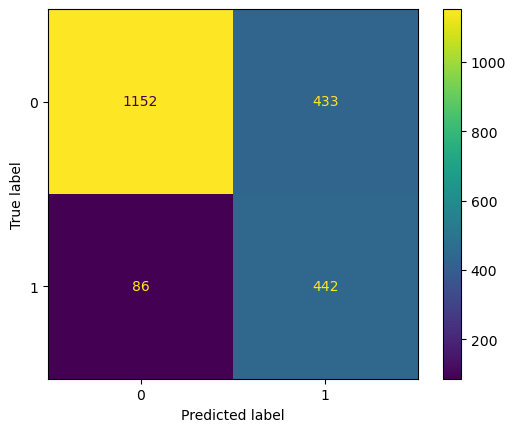

In [87]:
cm = confusion_matrix(y_test, pred2, labels=lr_bal.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr_bal.classes_)
disp.plot()

**Downsampling**

In [44]:
#the number of the lowest category
category_1= round(dataset['Churn_Yes'].value_counts()[1]- dataset['Churn_Yes'].value_counts()[1]*0.3)
category_1

1308

In [45]:
from imblearn.datasets import make_imbalance

In [46]:
X_train_smp, y_train_smp = make_imbalance(Xtrain_scaled, y_train, sampling_strategy={0: category_1, 1: category_1},random_state=14)

In [91]:
model_lr_smp= LogisticRegression()
model_lr_smp.fit(X_train_smp, y_train_smp)

LogisticRegression()

In [92]:
#get predictions
pred_smp= model_lr_smp.predict(Xtest_scaled)

In [93]:
accuracy2b= accuracy_score(y_test, pred_smp)
f1_score_lr2b= f1_score(y_test, pred_smp)
precision2b = precision_score(y_test, pred_smp)
recall2b = recall_score(y_test, pred_smp)
print('Metrics')
print('..........................................')
print('Accuracy score: ------------ ', accuracy2)
print('F1 score: ------------------ ', f1_score_lr2)
print('Precision score ------------ ', precision2)
print('Recall score --------------- ', recall2)

Metrics
..........................................
Accuracy score: ------------  0.7543776620918126
F1 score: ------------------  0.6300784034212401
Precision score ------------  0.5051428571428571
Recall score ---------------  0.8371212121212122


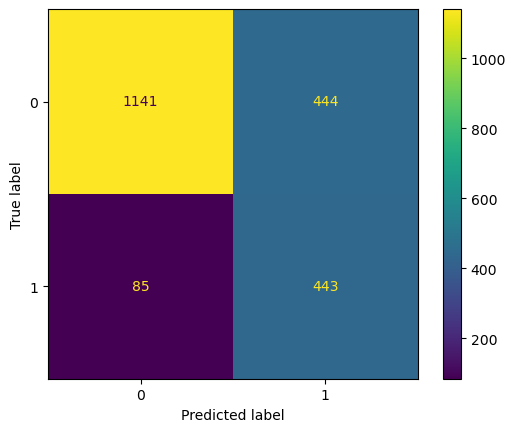

In [95]:
cm = confusion_matrix(y_test, pred_smp, labels=model_lr_smp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_lr_smp.classes_)
disp.plot()

__Random Forest Model, Decision Tree and XGB__

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [51]:
#get best parameter for randomforest
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf_mod = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf_mod, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002163728A790>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021637157A10>})

In [52]:
# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 11, 'n_estimators': 134}


In [53]:
rf= RandomForestClassifier(n_estimators=134, max_depth=11, random_state=42)
rf.fit(Xtrain_scaled, y_train)
pred3=rf.predict(Xtest_scaled)

In [54]:
accuracy3= accuracy_score(y_test, pred3)
f1_score_lr3= f1_score(y_test, pred3)
precision3 = precision_score(y_test, pred3)
recall3 = recall_score(y_test, pred3)
print('Metrics')
print('..........................................')
print('Accuracy score: ------------ ', accuracy3)
print('F1 score: ------------------ ', f1_score_lr3)
print('Precision score ------------ ', precision3)
print('Recall score --------------- ', recall3)

Metrics
..........................................
Accuracy score: ------------  0.8097491717936584
F1 score: ------------------  0.6043307086614172
Precision score ------------  0.6290983606557377
Recall score ---------------  0.5814393939393939


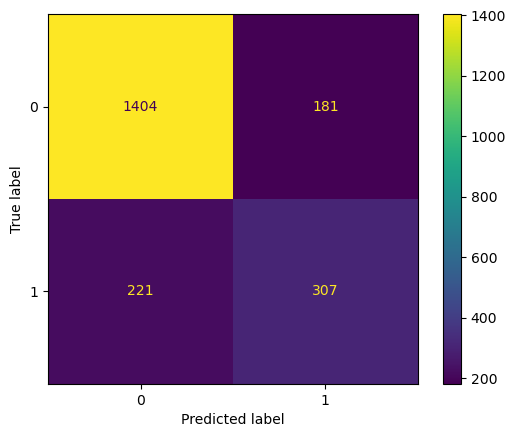

In [89]:
cm = confusion_matrix(y_test, pred3, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()

__Decision Tree__

In [56]:
dt= DecisionTreeClassifier(random_state=0)
dt.fit(Xtrain_scaled, y_train)
pred4=dt.predict(Xtest_scaled)

In [57]:
accuracy4= accuracy_score(y_test, pred4)
f1_score_lr4= f1_score(y_test, pred4)
precision4 = precision_score(y_test, pred4)
recall4 = recall_score(y_test, pred4)
print('Metrics')
print('..........................................')
print('Accuracy score: ------------ ', accuracy4)
print('F1 score: ------------------ ', f1_score_lr4)
print('Precision score ------------ ', precision4)
print('Recall score --------------- ', recall4)

Metrics
..........................................
Accuracy score: ------------  0.7302413629910081
F1 score: ------------------  0.5034843205574913
Precision score ------------  0.4661290322580645
Recall score ---------------  0.5473484848484849


In [58]:
confusion_matrix(y_test, pred4)

array([[1254,  331],
       [ 239,  289]], dtype=int64)

__Xg boost__

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
from xgboost import XGBClassifier
param_grid = {'max_depth': [2,4,6,8],
              'learning_rate': [0.01, 0.1, 0.2],
           #   'subsample': np.arange(0.5, 1.0, 0.1),
           #   'colsample_bytree': np.arange(0.5, 1.0, 0.1),
           #   'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [70,100]
              }


estimator = XGBClassifier(objective= 'binary:logistic',nthread=4)
random_search = RandomizedSearchCV(estimator=estimator, 
                           param_distributions=param_grid, 
                           n_iter=15,
                           scoring='f1', 
                           refit='f1', 
                           n_jobs=-1, 
                           cv=5, 
                           verbose=1)

random_search.fit(Xtrain_scaled, y_train)
print("tuned hpyerparameters :(best parameters) ",random_search.best_params_)
print("Mean CV f1_score of best_estimator, on Training :",random_search.best_score_)
best_model = random_search.best_estimator_
print("Best estimator:",best_model)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
tuned hpyerparameters :(best parameters)  {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
Mean CV f1_score of best_estimator, on Training : 0.5890637574011541
Best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)


In [96]:
print("f1 on Test data (Positive case only):",random_search.score(Xtest_scaled,y_test))
print("f1 on Train data:",random_search.score(Xtrain_scaled,y_train))
pred5 = random_search.predict(Xtest_scaled)

print("Classification report:") 
print(classification_report(y_test,pred5))
confusion_matrix(y_test,pred5)

f1 on Test data (Positive case only): 0.5886939571150097
f1 on Train data: 0.6566791510611735
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.61      0.57      0.59       528

    accuracy                           0.80      2113
   macro avg       0.73      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113



array([[1389,  196],
       [ 226,  302]], dtype=int64)

In [97]:
accuracy5= accuracy_score(y_test,pred5)
f1_score_lr5= f1_score(y_test, pred5)
precision5 = precision_score(y_test, pred5)
recall5 = recall_score(y_test, pred5)
print('Metrics')
print('..........................................')
print('Accuracy score: ------------ ', accuracy5)
print('F1 score: ------------------ ', f1_score_lr5)
print('Precision score ------------ ', precision5)
print('Recall score --------------- ', recall5)

Metrics
..........................................
Accuracy score: ------------  0.8002839564600095
F1 score: ------------------  0.5886939571150097
Precision score ------------  0.606425702811245
Recall score ---------------  0.571969696969697


As seen, the xgboost performed well in identifying the true positive values which are the no churn values. The model has higher precision for positive values than negative values. The total accuracy is 80%.
The random forest model however performed a little bit better than the Xgboost model.

### SUMMARY

In [101]:
accuracies= [accuracy,accuracy2,accuracy2b,accuracy3, accuracy4,accuracy5]
F1_scores= [f1_score_lr,f1_score_lr2,f1_score_lr2b,f1_score_lr3,f1_score_lr4,f1_score_lr5]
precisions= [precision,precision2,precision2b,precision3,precision4,precision5]
recalls= [recall,recall2,recall2b, recall3, recall4,recall5]
models= ['log reg','upsampling log_reg','downsampling log_reg', 'random forest', 'decision tree', 'xgboost']

df_metrics=pd.DataFrame()
df_metrics['models']=models
df_metrics['accuracies']= accuracies
df_metrics['F1_scores']= F1_scores
df_metrics['Precision']= precisions
df_metrics['recalls']= recalls

df_metrics

,models,accuracies,F1_scores,Precision,recalls
0,log reg,0.807383,0.607522,0.618861,0.596591
1,upsampling log_reg,0.754378,0.630078,0.505143,0.837121
2,downsampling log_reg,0.749645,0.626148,0.499436,0.839015
3,random forest,0.809749,0.604331,0.629098,0.581439
4,decision tree,0.730241,0.503484,0.466129,0.547348
5,xgboost,0.800284,0.588694,0.606426,0.571970


### CONCLUSION

We have identified a number of features to use for prediction, carried out data pre-processiong, generated new feautres and build models for churn prediction. but what is the cocnlusion here, which is the best performing model.

### BEST PERFORMING MODEL

Selecting the best performing model is not just a staight forward task. For the task at hand, which is churn prediction, there is a metric that will be most appropriate. This metric is the **RECALL**, recall is more appropriate becuase it is the metric that focuses on lowering the false negative values which means identifying the cases where a customer will churn. A model with low recall score means that we miss out on true positives and predicting some customers will not churn while they definately churn. The model with the best recall score is the logistic regression with the downsampling.

I would have tried the downsampled with other models but log reg already has the best recall score so it definately stay as best performing model.
***LOGISTIC REGRESSION IS THE BEST PERFORMING MODEL***